In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [3]:
#Gender 
student_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [4]:
#Gender t-tests
gender = student_df.gender.unique()
grouped_df = student_df.groupby('gender')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                student_df[student_df.gender==gender[i]][var], 
                student_df[student_df.gender==gender[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


There is a signficant difference in performance between males and females in every subject. Males performed better on the math exams, whereas females performed higher on both the reading and writing exams.

In [5]:
#Ethnicities
student_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [6]:
#Ethnicity t-tests
ethnicity = student_df['race/ethnicity'].unique()
grouped2_df = student_df.groupby('race/ethnicity')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicity)):
        for j in range(i+1, len(ethnicity)):
            print("t-test between groups {0} and {1}:".format(ethnicity[i], ethnicity[j]))
            print(stats.ttest_ind(
                student_df[student_df['race/ethnicity']==ethnicity[i]][var], 
                student_df[student_df['race/ethnicity']==ethnicity[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


Math: There are significant differences between all groups except B and A, B and C, and C and A.  

Reading: There are signficant differences between groups B and E, C and A, C and E, A and D, A and E, and D and E.

Writing: There are signficant differences between groups B and D, B and E, C and A, C and E, A and D, and A and E.

Overall, math had the most groups (7) with signficant differences.  Both reading and writing had an equal number of groups (6) with signficant differences.  The groups with signficant differences on all exams are B and E, C and E, A and D, and A and E. 

In [7]:
#Parental level of education
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [8]:
#Parental level of education t-tests
parent = student_df['parental level of education'].unique()
grouped3_df = student_df.groupby('parental level of education')
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parent)):
        for j in range(i+1, len(parent)):
            print("t-test between groups {0} and {1}:".format(parent[i], parent[j]))
            print(stats.ttest_ind(
                student_df[student_df['parental level of education']==parent[i]][var], 
                student_df[student_df['parental level of education']==parent[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

Math: There are signficant differences between bachelor's degree and high school, bachelor's degree and some high school, some college and high school, some college and some high school, master's and high school, master's and some high school, and associate's and high school.

Reading: There are significant differences between bachelor's and some college, bachelor's and high school, bachelor's and some high school, some college and master's, some college and high school, master's and associate's, master's and high school, master's and some high school, associate's and high school, associate's and some high school

Writing: There are no signficant differences between bachelor's and master's, some college and associate's, high school and some high school.  

Out of all the subjects, writing has the most significant differences between parental level of education and exam followed by reading and math.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [9]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [10]:
stats.ttest_ind(student_df[student_df.lunch == 'free/reduced'][['math score', 'reading score', 'writing score']],
               student_df[student_df.lunch == 'standard'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

The students who had a standard lunch outperformed those who had a free/reduced lunch.  There are studies that conclude that diet and performance are linked, so those who have a good meal prior to an exam may focus better, boost, memory and have more mental awareness than those who eat less or not at all. 

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [11]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [12]:
stats.ttest_ind(student_df[student_df['test preparation course'] == 'completed'][['math score', 'reading score', 'writing score']],
         student_df[student_df['test preparation course'] == 'none'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

The test preparation course does have a significant effect on exam performance.  The students that completed the test prep course performed better than those who did not. 

### 4. Which 2 exam scores are most correlated with each other?

In [13]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


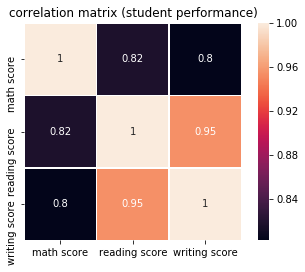

In [14]:
corrmat_student = student_df.corr()

sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title('correlation matrix (student performance)');

Reading and writing are the most correlated exams.  